# Evolución de pablaciones, modelo no espacial

## Evoluciones de una especie

Evolución de una población de una especie. En nuestro modelo consideramos sitios ocupados por la especie, llamados $A$, y sitios vacíos, $E$. Tenemos un total de $N$ sitios, de los cuales $n$ son $A$ y $(N-n)$ son $E$. Evolucionan en el tiempo a través de las siguientes dos tipos de interacciones:
1. Interacción de un individuo (ocurren con frecuencia $1-\mu$): se escoge un sitios, y si es $A$, con probabilidad d puede ocurrir el evento de muerte y ese lugar pasar a ser una $E$.
2. Interacción de dos individuos (ocurren con frecuencia $\mu$): se escogen dos sitios y se sigue de la siguiente manera:
    - Si son $A$ y $A$, entonces con probabilidad $c$ ocurre el evento de competición y los sitios pasan a ser $A$ y $E$.
    - Si son $A$ y $E$, entonces con probabilidad $b$ ocurre el evento de nacimiento y los sitios pasan a ser $A$ y $A$.

In [1]:
# imoprt libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
# Population evolution: first proposal
def population_evolution(N, n_initial, mu, d, c, b, t_max):
    #Initialization of n
    n = n_initial

    #Initialization of the list of n
    history_n = [n]

    #Iterate over time
    for t in range(t_max):
        #Choice he the interaction (1-mu: single, mu: double)
        if random.random() > mu:
            #Single interaction
            place = random.randint(0, N-1)
            if place < n: # The place choose is A
                if random.random() < d:
                    # Dying proccess occurs (A -> E)
                    n = n - 1   # "A" site is converted to "E"
        else:
            #Double interaction
            place1, place2 = random.sample(range(N), 2)
            if place1 < n and place2 < n: # Both places are A
                if random.random() < c:
                    # Competition proccess occurs (A + A -> A + E)
                    n = n - 1  # "A" site is converted to "E"
            elif (place1 < n and place2 >= n) or (place1 >= n and place2 < n):
                # Exactly one place is A
                if random.random() < b:
                    # Birth proccess occurs (A + E -> A + A)
                    n = n + 1  # "E" site is converted to "A"
        
        #Append the new value of n to the history
        history_n.append(n)
    
    return history_n

In [8]:
def ensamble_population_evolution(N, n_initial, mu, d, c, b, t_max, n_runs):
    #Initialization of the list of n
    history_n = np.zeros((n_runs, t_max+1))

    #Iterate over the number of runs
    for i in tqdm(range(n_runs)):
        history_n[i, :] = population_evolution(N, n_initial, mu, d, c, b, t_max)
    
    return history_n

In [19]:
# Observables
def get_density_from_ensamble(history_n, N):
    return np.mean(history_n, axis=0) / N

def get_variance_from_ensamble(history_n, N):
    return np.var(history_n, axis=0) / (N*N)

#### $N = 100$: simulación para $N$ grande.

In [24]:
# Parameters 
N = 100         # Number of sites
n_initial = 100  # Initial number of A individuals
mu = 0.5        # Fraction of single interactions
d = 0.5         # Death rate
c = 0.5         # Competition rate
b = 0.5         # Birth rate
t_max = 2000    # Maximum time
n_runs = 10000    # Number of runs

In [25]:
# Simulation
history_n = ensamble_population_evolution(N, n_initial, mu, d, c, b, t_max, n_runs)

100%|██████████| 10000/10000 [00:44<00:00, 222.54it/s]


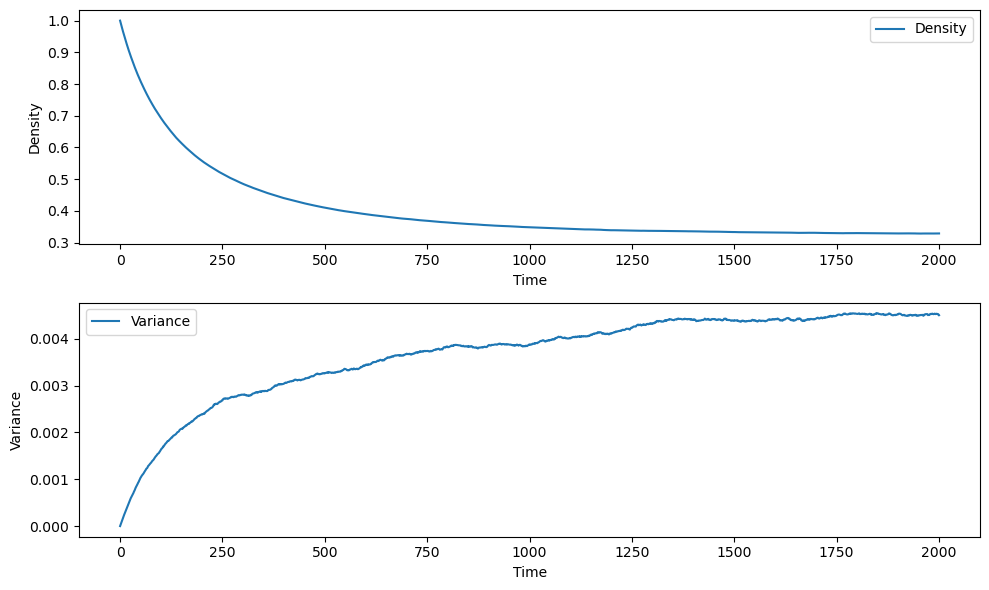

In [28]:
# Observables
density = get_density_from_ensamble(history_n, N)
variance = get_variance_from_ensamble(history_n, N)

# Plots
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(density, label='Density')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Density')
ax[0].legend()
#ax[0].set_ylim(0.3, 0.4)
ax[1].plot(variance, label='Variance')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Variance')
ax[1].legend()
plt.tight_layout()
plt.show()

#### $N = 10$. Simulación para $N$ chico.

In [29]:
# Parameters 
N = 10          # Number of sites
n_initial = 10  # Initial number of A individuals
mu = 0.5        # Fraction of single interactions
d = 0.5         # Death rate
c = 0.5         # Competition rate
b = 0.5         # Birth rate
t_max = 2000    # Maximum time
n_runs = 10000    # Number of runs

In [30]:
# Simulation
history_n2 = ensamble_population_evolution(N, n_initial, mu, d, c, b, t_max, n_runs)

100%|██████████| 10000/10000 [00:44<00:00, 224.84it/s]


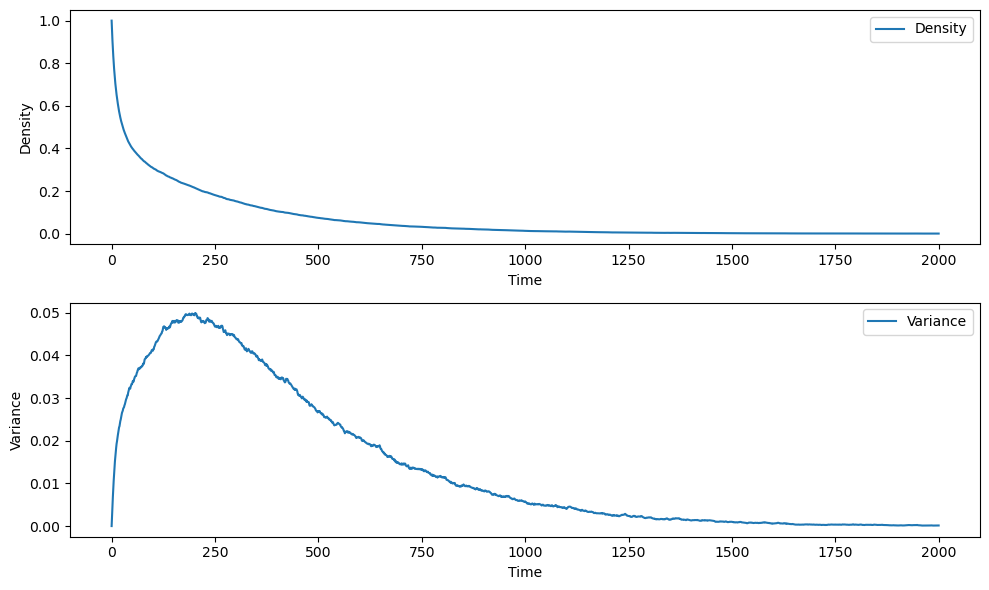

In [32]:
# Observables
density = get_density_from_ensamble(history_n2, N)
variance = get_variance_from_ensamble(history_n2, N)

# Plots
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(density, label='Density')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Density')
ax[0].legend()
#ax[0].set_ylim(0.3, 0.4)
ax[1].plot(variance, label='Variance')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Variance')
ax[1].legend()
plt.tight_layout()
plt.show()

Vemos que para los mismos parámetros la población desaparece al tomar un tamaño de población más pequeño.

## Evoluciones de dos especies

Evolución de una población de dos especies. En nuestro modelo consideramos sitios ocupados por dos especies, llamados $A$ y $B$, y sitios vacíos, $E$. Tenemos un total de $N$ sitios, de los cuales $n$ son $A$, $m$ son $B$ y $(N-n)$ son $E$. Evolucionan en el tiempo a través de las siguientes dos tipos de interacciones:
1. Interacción de un individuo (ocurren con frecuencia $1-\mu$): se escoge un sitio y se procede de la siguiente manera:
    - Si es $A$, entonces con probabilidad $d_1$ puede ocurrir el evento de muerte y ese sitio pasar a ser una $E$.
    - Si es $B$, entonces con probabilidad $d_2$ puede ocurrir el evento de muerte y se sitio para a ser $E$.
2. Interacción de dos individuos (ocurren con frecuencia $\mu$): se escogen dos sitios y se sigue de la siguiente manera:
    - Si son $A$ y $A$, entonces con probabilidad $c_{11}$ ocurre el evento de competición y los sitios pasan a ser $A$ y $E$.
    - Si son $A$ y $B$, entonces con probabilidad $c_{12}$ ocurre el evento de competición y los sitios pasan a ser $A$ y $E$.
    - Si son $A$ y $E$, entonces con probabilidad $b_1$ ocurre el evento de nacimiento y los sitios pasan a ser $A$ y $A$.
    - Si son $B$ y $B$, entonces con probabilidad $c_{22}$ ocurre el evento de competición y los sitios pasan a ser $B$ y $E$.
    - Si son $B$ y $A$, entonces con probabilidad $c_{21}$ ocurre el evento de competición y los sitios pasan a ser $B$ y $E$.
    - Si son $B$ y $E$, entonces con probabilidad $b_2$ ocurre el evento de nacimiento y los sitios pasan a ser $B$ y $B$.
    - Cualquier otro caso no ocurre nada en la evolución


In [2]:
# Choice of the specie in the place
def specie_choiced(place, n, m):
    if place < n:
        return "A"
    elif place < n + m:
        return "B"
    else:
        return "E"

# Choice of the species in the places
def species_choiced(place1, place2, n, m):
    specie1 = specie_choiced(place1, n, m)
    specie2 = specie_choiced(place2, n, m)
    return specie1, specie2

# population evolution for two species
def population_evolution_two_species(N, n_initial, m_initial, mu, d1, d2, c11, c12, c21, c22, b1, b2, t_max):
    #Initialization of n and m
    n = n_initial
    m = m_initial

    #Initialization of the list of n and m
    history_n = [n]
    history_m = [m]

    #Iterate over time
    for t in range(t_max):
        #Choice he the interaction (1-mu: single, mu: double)
        if random.random() > mu:
            #Single interaction
            place = random.randint(0, N-1)
            specie = specie_choiced(place, n, m)
            if specie == "A": # The place choose is A
                if random.random() < d1:
                    # Dying proccess occurs (A -> E)
                    n = n - 1   # "A" site is converted to "E"
            elif specie == "B": # The place choose is B
                if random.random() < d2:
                    # Dying proccess occurs (B -> E)
                    m = m - 1   # "B" site is converted to "E"
        else:
            #Double interaction
            place1, place2 = random.sample(range(N), 2)
            specie1, specie2 = species_choiced(place1, place2, n, m)
            # switch between the posibilities of species
            if specie1 == "A" and specie2 == "A":
                if random.random() < c11:
                    # Competition intraspecie proccess occurs (A + A -> A + E)
                    n = n - 1
            elif specie1 == "A" and specie2 == "B":
                if random.random() < c12:
                    # Competition interspecie proccess occurs (A + B -> A + E)
                    m = m - 1
            elif specie1 == "A" and specie2 == "E":
                if random.random() < b1:
                    # Birth proccess occurs (A + E -> A + A)
                    n = n + 1
            elif specie1 == "B" and specie2 == "B":
                if random.random() < c22:
                    # Competition intraspecie proccess occurs (B + B -> B + E)
                    m = m - 1
            elif specie1 == "B" and specie2 == "A":
                if random.random() < c21:
                    # Competition interspecie proccess occurs (B + A -> B + E)
                    n = n - 1
            elif specie1 == "B" and specie2 == "E":
                if random.random() < b2:
                    # Birth proccess occurs (B + E -> B + B)
                    m = m + 1
            elif specie1 == "E" and specie2 == "A":
                if random.random() < b1:
                    # Birth proccess occurs (E + A -> A + A)
                    n = n + 1
            elif specie1 == "E" and specie2 == "B":
                if random.random() < b2:
                    # Birth proccess occurs (E + B -> B + B)
                    m = m + 1
            elif specie1 == "E" and specie2 == "E":
                pass

        #Append the new value of n and m to the history
        history_n.append(n)
        history_m.append(m)
    
    return history_n, history_m
                

In [3]:
# ensamble population evolution for two species
def ensamble_population_evolution_two_species(N, n_initial, m_initial, mu, d1, d2, c11, c12, c21, c22, b1, b2, t_max, n_runs):
    #Initialization of the list of n and m
    history_n = np.zeros((n_runs, t_max+1))
    history_m = np.zeros((n_runs, t_max+1))

    #Iterate over the number of runs
    for i in tqdm(range(n_runs)):
        history_n[i, :], history_m[i, :] = population_evolution_two_species(N, n_initial, m_initial, mu, d1, d2, c11, c12, c21, c22, b1, b2, t_max)
    
    return history_n, history_m

# Observables
def get_density_from_ensamble_two_species(history_n, history_m, N):
    return np.mean(history_n, axis=0) / N, np.mean(history_m, axis=0) / N

def get_variance_from_ensamble_two_species(history_n, history_m, N):
    return np.var(history_n, axis=0) / (N*N), np.var(history_m, axis=0) / (N*N)

#### Simulación $N$ grande ($N = 400$) y $c_{12} = c_{21} = 0$

In [47]:
# Parameters
N = 400         # Number of sites
n_initial = 200  # Initial number of A individuals
m_initial = 200  # Initial number of B individuals
mu = 0.5        # Fraction of single interactions
d1 = 0.5        # Death rate for A
d2 = 0.5        # Death rate for B
c11 = 0.5       # Competition rate for A-A
c12 = 0       # Competition rate for A-B
c21 = 0       # Competition rate for B-A
c22 = 0.5       # Competition rate for B-B
b1 = 0.5        # Birth rate for A
b2 = 0.5        # Birth rate for B
t_max = 10000    # Maximum time
n_runs = 1000    # Number of runs

In [48]:
# Simulation
history_n, history_m = ensamble_population_evolution_two_species(N, n_initial, m_initial, mu, d1, d2, c11, c12, c21, c22, b1, b2, t_max, n_runs)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:30<00:00, 32.39it/s]


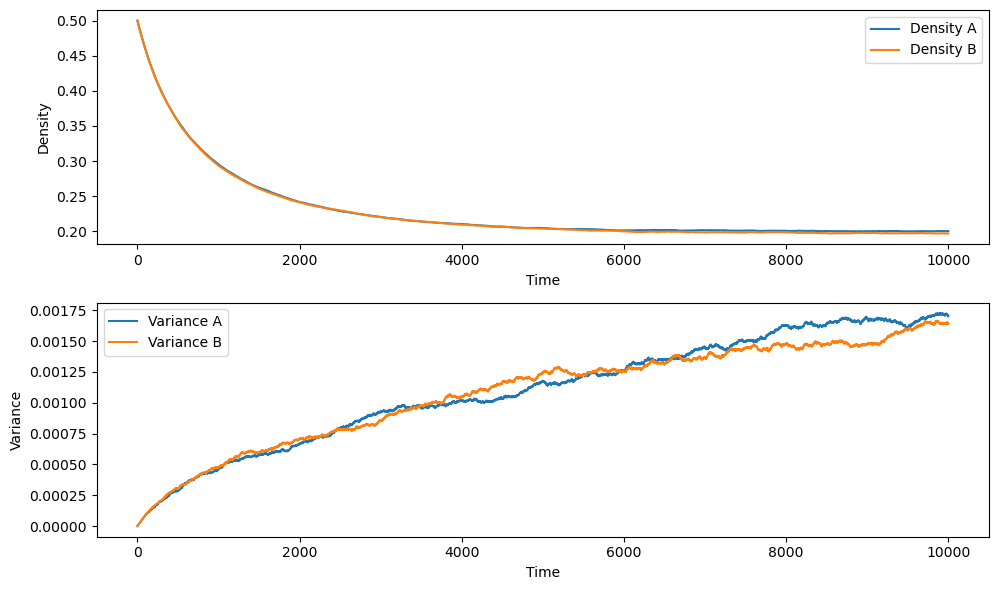

In [49]:
# Observables
density_n, density_m = get_density_from_ensamble_two_species(history_n, history_m, N)
variance_n, variance_m = get_variance_from_ensamble_two_species(history_n, history_m, N)

# Plots
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(density_n, label='Density A')
ax[0].plot(density_m, label='Density B')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Density')
ax[0].legend()
ax[1].plot(variance_n, label='Variance A')
ax[1].plot(variance_m, label='Variance B')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Variance')
ax[1].legend()
plt.tight_layout()
plt.show()


#### Simulación para N más pequeño (N = 40)

In [50]:
# Parameters
N = 40         # Number of sites
n_initial = 20  # Initial number of A individuals
m_initial = 20  # Initial number of B individuals
mu = 0.5        # Fraction of single interactions
d1 = 0.5        # Death rate for A
d2 = 0.5        # Death rate for B
c11 = 0.5       # Competition rate for A-A
c12 = 0       # Competition rate for A-B
c21 = 0       # Competition rate for B-A
c22 = 0.5       # Competition rate for B-B
b1 = 0.5        # Birth rate for A
b2 = 0.5        # Birth rate for B
t_max = 10000    # Maximum time
n_runs = 1000    # Number of runs

In [51]:
# Simulation
history_n2, history_m2 = ensamble_population_evolution_two_species(N, n_initial, m_initial, mu, d1, d2, c11, c12, c21, c22, b1, b2, t_max, n_runs)

100%|██████████| 1000/1000 [00:32<00:00, 30.94it/s]


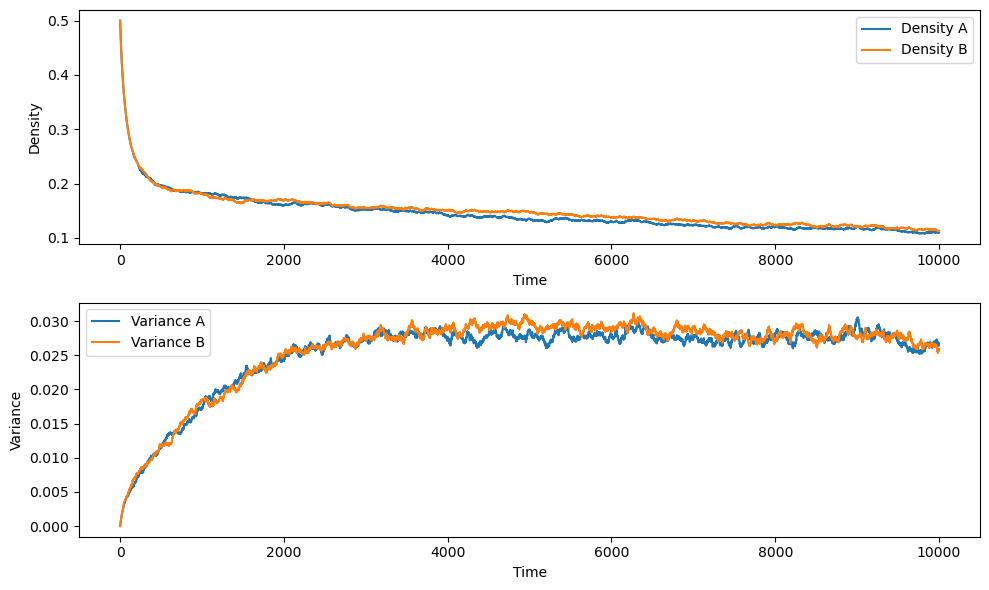

In [52]:
# observables
density_n2, density_m2 = get_density_from_ensamble_two_species(history_n2, history_m2, N)
variance_n2, variance_m2 = get_variance_from_ensamble_two_species(history_n2, history_m2, N)

# Plots
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(density_n2, label='Density A')
ax[0].plot(density_m2, label='Density B')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Density')
ax[0].legend()
ax[1].plot(variance_n2, label='Variance A')
ax[1].plot(variance_m2, label='Variance B')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Variance')
ax[1].legend()
plt.tight_layout()
plt.show()

De nuevo, parece haber un comportamiento de extinción de ambas especies

#### Simulación para $c_{12} \neq c_{21} \neq 0$

Supondremos que la especie $A$ es dominante sobre la especie $B$, de modo que $c_{12} > c_{21} = 0$ 

In [53]:
# Parameters
N = 40         # Number of sites
n_initial = 20  # Initial number of A individuals
m_initial = 20  # Initial number of B individuals
mu = 0.5        # Fraction of single interactions
d1 = 0.5        # Death rate for A
d2 = 0.5        # Death rate for B
c11 = 0.5       # Competition rate for A-A
c12 = 0.1       # Competition rate for A-B
c21 = 0       # Competition rate for B-A
c22 = 0.5       # Competition rate for B-B
b1 = 0.5        # Birth rate for A
b2 = 0.5        # Birth rate for B
t_max = 10000    # Maximum time
n_runs = 1000    # Number of runs

In [57]:
# Simulation
history_n3, history_m3 = ensamble_population_evolution_two_species(N, n_initial, m_initial, mu, d1, d2, c11, c12, c21, c22, b1, b2, t_max, n_runs)

100%|██████████| 1000/1000 [00:26<00:00, 37.50it/s]


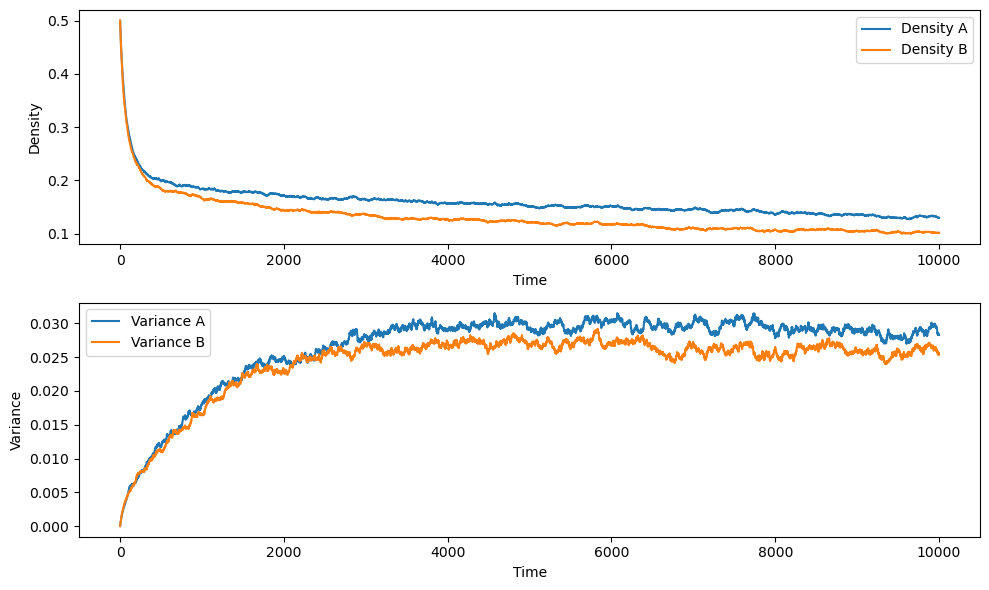

In [58]:
# observables
density_n3, density_m3 = get_density_from_ensamble_two_species(history_n3, history_m3, N)
variance_n3, variance_m3 = get_variance_from_ensamble_two_species(history_n3, history_m3, N)

# Plots
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(density_n3, label='Density A')
ax[0].plot(density_m3, label='Density B')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Density')
ax[0].legend()
ax[1].plot(variance_n3, label='Variance A')
ax[1].plot(variance_m3, label='Variance B')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Variance')
ax[1].legend()
plt.tight_layout()
plt.show()